In [15]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error , r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV

In [16]:
insurance_data = pd.read_csv("insurance.csv")

X = insurance_data.drop(columns=["charges"])
y = insurance_data["charges"]

X = pd.get_dummies(X,columns=["region"],drop_first = True, dtype=int)

X["sex"] = X["sex"].map({"female" : 1, "male" : 0})
X["smoker"] = X["smoker"].map({"yes" : 1, "no" : 0})

X["age_smoker"] = X["smoker"]* X["age"]
X["bmi_smoker"] = X["smoker"]* X["bmi"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [18]:
alphas = [0.001, 0.1, 1, 2, 5, 10, 20, 40, 50, 100]
mses = []

for a in alphas: 
    lasso_model = Lasso(alpha=a)
    lasso_model.fit(X_train, y_train)
    
    y_pred = lasso_model.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    print(f"for alpha = : {a} ",mse)
    mses.append(mse)

for alpha = : 0.001  20922599.87103596
for alpha = : 0.1  20921803.69843138
for alpha = : 1  20914832.635089137
for alpha = : 2  20908106.779954515
for alpha = : 5  20890881.000633497
for alpha = : 10  20872844.794796687
for alpha = : 20  20877828.53237883
for alpha = : 40  21046489.293890774
for alpha = : 50  21196929.86960891
for alpha = : 100  22423172.686023254


<Axes: >

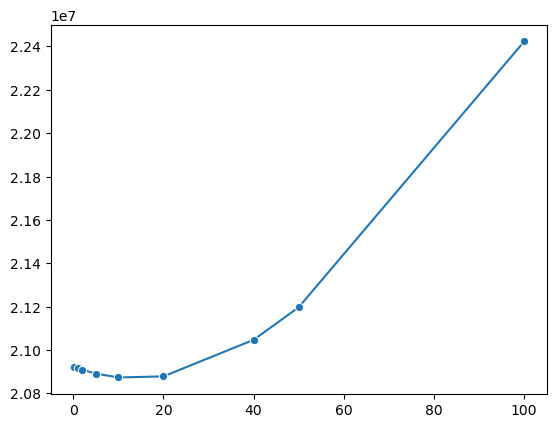

In [19]:
import seaborn as sns
sns.lineplot(x=alphas,y=mses, marker="o")

In [20]:

a = [0.001, 0.1, 1, 2, 5, 10, 20, 30, 50, 100]

lasso_cv_model = LassoCV(
    alphas=a,
    cv=5,
    max_iter=1000,
    random_state=42
)

lasso_cv_model.fit(X_train, y_train)

print("Best Alpha ", lasso_cv_model.alpha_) 

y_pred = lasso_cv_model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("MSE = ",mse)
print("r2 = ",r2)

Best Alpha  0.001
MSE =  20922599.87103596
r2 =  0.8652317499151699
